# Hotel Reservations EDA
### Manuel García Plaza, José Miguel Ramírez Muñoz

Data from:
https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [43]:
ruta_csv = "C:\\Users\\manug\\OneDrive\\Escritorio\\Mates\\CUARTO\\SEGUNDO CUATRI\\DATOS 2\\AAII_2022-main\\trabajo_tema1\\hotel_reservations.csv"
data = readr::read_csv(ruta_csv)

Rows: 36275 Columns: 19
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (5): Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_...
dbl (14): no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nig...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


The file contains the different attributes of customers' reservation details. Here is a little description of the variables:
### Data dictionary:

• **Booking_ID:** unique identifier of each booking

• **no_of_adults:** Number of adults

• **no_of_children:** Number of Children

• **no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

• **no_of_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

• **type_of_meal_plan:** Type of meal plan booked by the customer:

• **required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)

• **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

• **lead_time:** Number of days between the date of booking and the arrival date

• **arrival_year:** Year of arrival date

• **arrival_month:** Month of arrival date

• **arrival_date:** Date of the month

• **market_segment_type:** Market segment designation.

• **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)

• **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking

• **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking

• **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

• **no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

• **booking_status:** Flag indicating if the booking was canceled or not.

In [3]:
head(data)

Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled


In [64]:
cat('The dataset contains', nrow(data), 'bookings and', ncol(data)-1, 'variables ')

The dataset contains 36275 bookings and 18 variables 

In [69]:
sapply(data, class)

Booking_ID                         no_of_adults 
                         "character"                            "numeric" 
                      no_of_children                 no_of_weekend_nights 
                           "numeric"                            "numeric" 
                   no_of_week_nights                    type_of_meal_plan 
                           "numeric"                          "character" 
          required_car_parking_space                   room_type_reserved 
                           "numeric"                          "character" 
                           lead_time                         arrival_year 
                           "numeric"                            "numeric" 
                       arrival_month                         arrival_date 
                           "numeric"                            "numeric" 
                 market_segment_type                       repeated_guest 
                         "character"                            "numeric" 
        no_of_previous_cancellations no_of_previous_bookings_not_canceled 
                           "numeric"                            "numeric" 
                  avg_price_per_room               no_of_special_requests 
                           "numeric"                            "numeric" 
                      booking_status 
                         "character"

In [68]:
cat('Categorizing variables, we have', sum(sapply(data, class) == 'numeric')-2, 'numerical variables and', sum(sapply(data, class) == 'character')+1, 'categorical ones.')

Categorizing variables, we have 12 numerical variables and 6 categorical ones.

In [56]:
sum(is.na(data) == TRUE)

[1] 0

So we don't have missing or NaN values.

In [49]:
summary(data)

  Booking_ID         no_of_adults   no_of_children    no_of_weekend_nights
 Length:36275       Min.   :0.000   Min.   : 0.0000   Min.   :0.0000      
 Class :character   1st Qu.:2.000   1st Qu.: 0.0000   1st Qu.:0.0000      
 Mode  :character   Median :2.000   Median : 0.0000   Median :1.0000      
                    Mean   :1.845   Mean   : 0.1053   Mean   :0.8107      
                    3rd Qu.:2.000   3rd Qu.: 0.0000   3rd Qu.:2.0000      
                    Max.   :4.000   Max.   :10.0000   Max.   :7.0000      
 no_of_week_nights type_of_meal_plan  required_car_parking_space
 Min.   : 0.000    Length:36275       Min.   :0.00000           
 1st Qu.: 1.000    Class :character   1st Qu.:0.00000           
 Median : 2.000    Mode  :character   Median :0.00000           
 Mean   : 2.204                       Mean   :0.03099           
 3rd Qu.: 3.000                       3rd Qu.:0.00000           
 Max.   :17.000                       Max.   :1.00000           
 room_type_reserved 

Let's see which are the values of these categorical variables:

In [86]:
unique(data$type_of_meal_plan)
unique(data$room_type_reserved)
unique(data$market_segment_type)
unique(data$booking_status)

[1] "Meal Plan 1"  "Not Selected" "Meal Plan 2"  "Meal Plan 3"

[1] "Room_Type 1" "Room_Type 4" "Room_Type 2" "Room_Type 6" "Room_Type 5"
[6] "Room_Type 7" "Room_Type 3"

[1] "Offline"       "Online"        "Corporate"     "Aviation"     
[5] "Complementary"

[1] "Not_Canceled" "Canceled"

In [54]:
#hist(gapminder$no_of_previous_cancellations)

In [53]:
#gapminder$room_type_reserved;gapminder$avg_price_per_room

In [51]:
#sum(gapminder$room_type_reserved == 'Room_Type 1')/length(gapminder$Booking_ID)

In [50]:
#hist(gapminder$arrival_month)

In [52]:
#cor(gapminder[c(2:5,7,9, 14:18)])

[1] 0

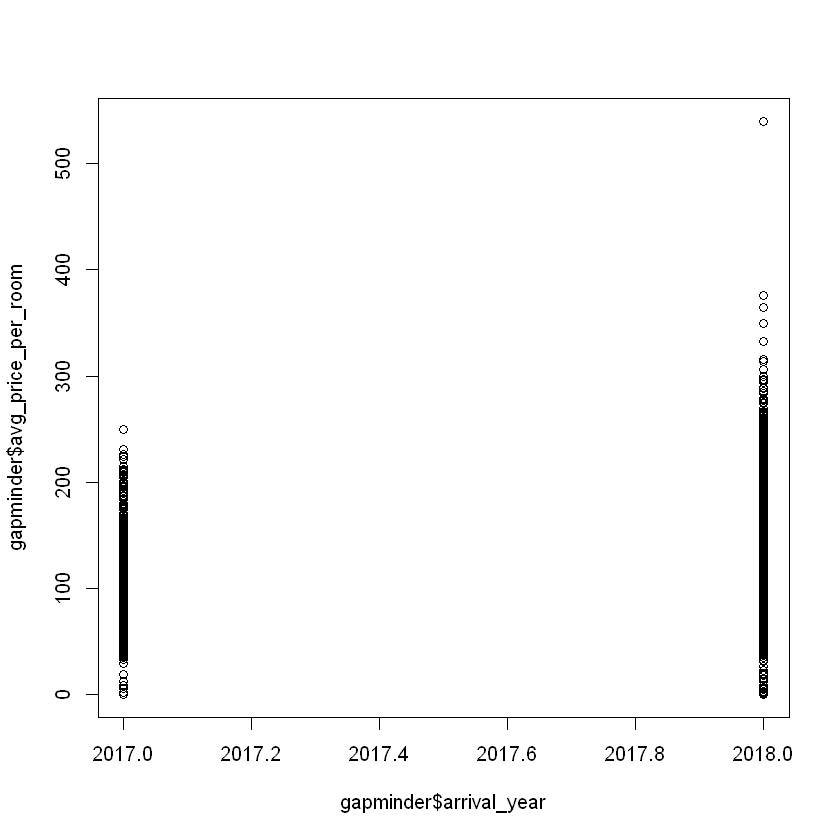

In [14]:
plot(gapminder$arrival_year, gapminder$avg_price_per_room)

In [22]:
sort(unique(gapminder$arrival_month))

[1]  1  2  3  4  5  6  7  8  9 10 11 12

In [23]:
unique(gapminder$arrival_year)

[1] 2017 2018

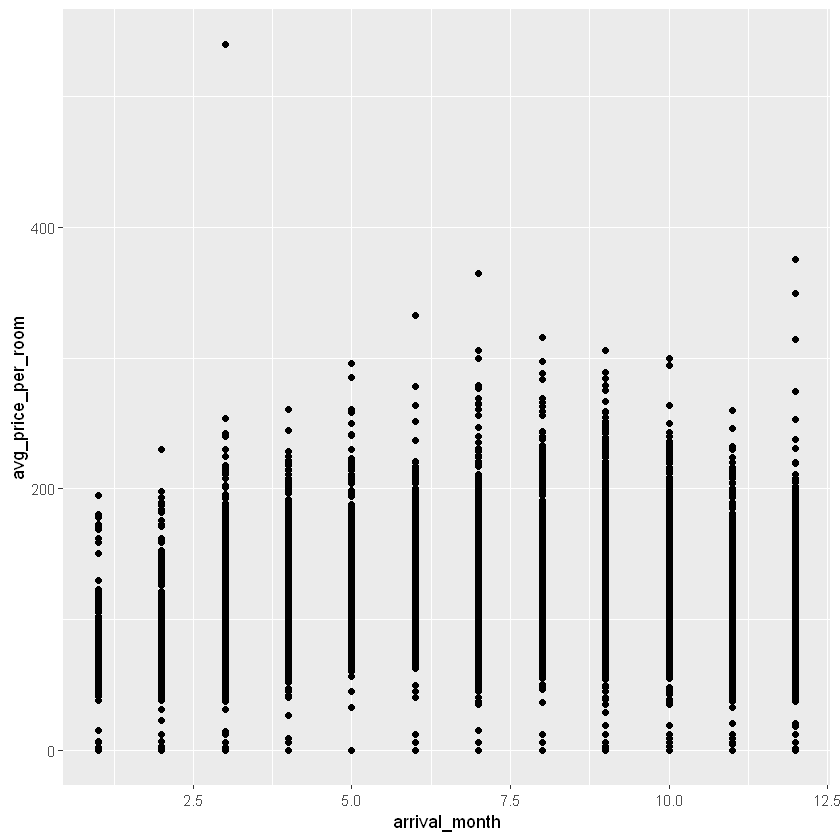

In [36]:
ggplot2::ggplot(data = gapminder) + 
  ggplot2::geom_point(ggplot2::aes(arrival_month, avg_price_per_room))
 # ggplot2::facet_grid(~vs)